# Introduction to TensorFlow

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.layers as tfl
from pprint import pprint

In [ ]:
print(tf.__version__)

## Constants

In [ ]:
scalar = tf.constant(1, dtype=tf.int8)
vector = tf.constant([1, 2, 3], dtype=tf.float32)
matrix = tf.constant(np.array([[1, 2], [3, 4]]), dtype=tf.float32)

pprint([scalar, vector, matrix])

## Variables
Tensors are immutable, the values in tensors can't be updated in-place. Variables are just like Tensors in terms of as inputs to operations, but with the in-place value update methods.

In [ ]:
x = tf.random.uniform((3, 2))
v = tf.Variable(x)
pprint(v)

In [ ]:
pprint(tf.square(v))

In [ ]:
# Variables can be updated with .assign, .assign_add, .assign_sub
v.assign(tf.square(v))
pprint(v)

## Loading Data

In [ ]:
housing_url = 'https://www.kaggle.com/datasets/camnugent/california-housing-prices'
path = tf.keras.utils.get_file(housing_url.split("/")[-1], housing_url)

In [ ]:
def map_line(x):
    return tf.strings.to_number(tf.strings.split(x))

In [ ]:
housing = (tf.data.TextLineDataset(path) .map(map_line))

In [ ]:
print(housing)

In [ ]:
mnist = tfds.load('mnist', split=None)
mnist_train = mnist['train']
mnist_test = mnist['test']

In [ ]:
x_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.Variable(x_vals, dtype=tf.float32)
m_const = tf.constant(3.)
operation = tf.multiply(x_data, m_const)
for result in operation:
    print(result)

In [ ]:
# The adapt() method
data = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.8, 0.9, 1.0],
        [1.5, 1.6, 1.7],
    ]
)
layer = tfl.Normalization()
layer.adapt(data)
normalized_data = layer(data)

print("Features mean: %.2f" % (normalized_data.numpy().mean()))
print("Features std: %.2f" % (normalized_data.numpy().std()))


In [ ]:
print(normalized_data.numpy())

In [ ]:
data = [
    "ξεῖν᾽, ἦ τοι μὲν ὄνειροι ἀμήχανοι ἀκριτόμυθοι",
    "γίγνοντ᾽, οὐδέ τι πάντα τελείεται ἀνθρώποισι.",
    "δοιαὶ γάρ τε πύλαι ἀμενηνῶν εἰσὶν ὀνείρων:",
    "αἱ μὲν γὰρ κεράεσσι τετεύχαται, αἱ δ᾽ ἐλέφαντι:",
    "τῶν οἳ μέν κ᾽ ἔλθωσι διὰ πριστοῦ ἐλέφαντος,",
    "οἵ ῥ᾽ ἐλεφαίρονται, ἔπε᾽ ἀκράαντα φέροντες:",
    "οἱ δὲ διὰ ξεστῶν κεράων ἔλθωσι θύραζε,",
    "οἵ ῥ᾽ ἔτυμα κραίνουσι, βροτῶν ὅτε κέν τις ἴδηται.",
]
layer = tfl.TextVectorization()
layer.adapt(data)
vectorized_text = layer(data)
print(vectorized_text.numpy())

In [ ]:
vocab = ["a", "b", "c", "d"]
data = tf.constant(
    [
        ["a", "c", "d"],
        ["d", "z", "b"]
    ]
)
layer = tfl.StringLookup(vocabulary=vocab)
vectorized_data = layer(data)
print(vectorized_data.numpy())

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

In [ ]:
for elem in dataset:
    print(elem)

In [34]:
def data_generator(stop):
    i = 0
    while i < stop:
        yield i
        i += 1

for n in data_generator(16):
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [35]:
ds_counter = tf.data.Dataset.from_generator(data_generator, args=[25], output_types=tf.int32, output_shapes = (), )

In [36]:
for elem in ds_counter:
    print(elem)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(24, shape=(), dtype=int32)


In [43]:
for count_batch in ds_counter.repeat().batch(5).take(10):
    print(count_batch.numpy())

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]


In [46]:
def series_generator():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i , np.random.normal(size=(size,))
        i += 1

In [47]:
for i, series in series_generator():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [-0.52577006  0.15135387  0.08328283 -1.15222412]
1 : [ 0.90713478  0.59304297 -1.40894815  0.89898145 -0.60435188]
2 : [-0.09998985 -1.15263139  0.0483782   1.23428057 -0.1758445  -0.82077359
  0.31463303  1.0089043   0.32693901]
3 : [-0.5004838   0.42143874 -0.74155229  1.30287268 -0.00735828  0.14138892
 -0.45501711  1.75522257]
4 : [ 0.88531481  1.87502609  1.08545837  0.15754487 -0.54553106  0.10526236]
5 : [-1.56697072]
6 : [-2.07550817 -0.62693396  0.62375256 -1.04487745 -0.11459178  1.08406866
 -1.61653636]


In [48]:
ds_series = tf.data.Dataset.from_generator(
    series_generator,
    output_types=( tf.int32, tf.float32 ),
    output_shapes=( () , (None,) )
)

ds_series


<_FlatMapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [64]:
for i, series in ds_series.take(10):
    print(i.numpy(), ":", str(series))

0 : tf.Tensor([-0.26824343 -0.34363776  0.37462947  0.02909689], shape=(4,), dtype=float32)
1 : tf.Tensor([-0.7191006], shape=(1,), dtype=float32)
2 : tf.Tensor([-1.130739   -0.03319496  0.99230486], shape=(3,), dtype=float32)
3 : tf.Tensor([], shape=(0,), dtype=float32)
4 : tf.Tensor([], shape=(0,), dtype=float32)
5 : tf.Tensor([-0.26962352 -0.04675484  0.10044806 -0.45673427  2.0967677  -0.2501807 ], shape=(6,), dtype=float32)
6 : tf.Tensor([-0.4847367], shape=(1,), dtype=float32)
7 : tf.Tensor([0.21972245 0.45041406 0.30630097], shape=(3,), dtype=float32)
8 : tf.Tensor(
[ 0.78371245 -0.18770793  1.5099924  -1.5515782  -0.3029587  -0.5926284
  0.10811343 -0.3651369 ], shape=(8,), dtype=float32)
9 : tf.Tensor([-0.6121984   0.46933022  2.0205777   0.7922376  -0.65587    -0.09262864], shape=(6,), dtype=float32)


In [65]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)
ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 2  9 12 15 11  4  8  1 14 21]

[[ 0.7341958  -0.30537906 -0.32365206 -0.69228566 -0.6036452   0.69741714
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.28047848  0.37631777 -1.280457    1.0410277   0.29518455 -1.2252655
   0.7798548  -1.1432472   0.        ]
 [ 0.80169004 -0.9468091  -0.3782599  -0.50369775 -0.45375717  0.
   0.          0.          0.        ]
 [ 1.1852577   0.80113745 -0.99730825 -0.5834163   1.4470676  -0.2833304
  -0.48389223  1.760448   -2.1520875 ]
 [-0.26586178  0.8707708   0.58399165 -0.09735711  0.13445508  0.5888256
   1.1323658   0.3372777   0.45088732]
 [ 0.8000816   1.5016071  -0.27526507  1.345397    0.9820307   0.
   0.          0.          0.        ]
 [-0.83217746 -2.0609105   0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.53971547  1.4434272  -0.51465386 -2.04394    -1.6282897  -0.97103596
   0.          0.       

In [75]:
ds_series_batch = ds_series.shuffle(10).padded_batch(5).take(3)
for i, series in ds_series_batch:
    print(i.numpy())
    print()
    print(series.numpy())

[8 1 6 0 4]

[[ 0.6065705   0.82314134 -0.00639413 -0.05514141  0.          0.
   0.          0.        ]
 [ 0.471073   -1.0490991  -1.12394    -0.18978877  0.09526581  0.36032838
   0.11125123 -2.0950665 ]
 [-0.9959922  -0.31214672 -0.4583778  -0.09896252  1.3369933   0.4199909
  -1.2175928   1.9549452 ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.02120027 -0.23326431  1.2483307  -2.6686153  -1.3876977   2.3546011
  -1.6776199  -0.5648831 ]]
[12  2  9 16 13]

[[ 1.7136036   0.98006725  0.31625834  0.5564249   0.          0.        ]
 [ 0.01498396  0.42143452 -0.5411094  -1.335486    2.1292894  -0.3434021 ]
 [-0.37414038  0.58176345  0.34699988  0.2723727   0.          0.        ]
 [-0.4991237  -0.4715251   0.58334     0.5418271   0.          0.        ]
 [ 1.2912915  -0.71500504 -1.5471034   0.3677428   0.68836963  0.        ]]
[15 18 20 11 22]

[[ 0.4085247  -0.9310506  -1.06107    -1.0773869   0.30007938]
 [ 1.8623031  -0.5769093

In [76]:
ds_series_batch = ds_series.shuffle(10).padded_batch(5).take(3)
for i, series in ds_series_batch:
    print(i.numpy())
    print()
    print(series.numpy())


[ 6  7  9 10  5]

[[ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.0130842  -0.8626115  -0.1085787   1.1384116  -0.3794611   0.17965871
  -3.1070688 ]
 [-0.07886361 -1.756091   -1.357767    0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.27838013  0.8180086  -0.8498072  -0.85760707 -0.13011813  0.
   0.        ]]
[12  2 13 14 16]

[[ 0.06158501 -1.6077456  -0.2951846   2.393243    0.          0.
   0.          0.          0.        ]
 [-0.72207206 -0.5657133  -0.951105    1.7193034   0.00582094  0.
   0.          0.          0.        ]
 [-0.17290498 -0.42158946 -0.3992205   0.          0.          0.
   0.          0.          0.        ]
 [ 0.14145431  0.5217148  -0.76568097 -0.29579392 -0.397085    0.8558639
  -0.43813255  1.6976395  -0.12860355]
 [ 0.4675594   0.12046949 -1.5348339  -1.1823702  -0.80536157  0.22427832
   1.0301243  -0.49541447  0.6125103 ]]
[11 20  1

In [77]:
flowers = tf.keras.utils.get_file('flower_photos',  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',  untar=True)

In [91]:
print(flowers)

/Users/dmmil/.keras/datasets/flower_photos


In [78]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [79]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [80]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [81]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


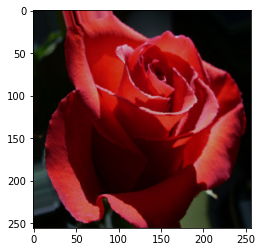

images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


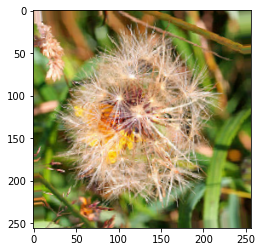

In [90]:
for images, labels in ds.take(2):
    print('images.shape: ', images.shape)
    print('labels.shape: ', labels.shape)
    plt.imshow(images[0])
    plt.show()

In [92]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [96]:
df = pd.read_csv(titanic_file)

In [97]:
df.head(10)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [98]:
ds = tf.data.Dataset.from_tensor_slices(dict(df))

In [100]:
for feature_batch in ds.take(1):
    for key, value in feature_batch.items():
        print("  {!r:30s}: {}".format(key, value))

  'survived'                    : 0
  'sex'                         : b'male'
  'age'                         : 22.0
  'n_siblings_spouses'          : 1
  'parch'                       : 0
  'fare'                        : 7.25
  'class'                       : b'Third'
  'deck'                        : b'unknown'
  'embark_town'                 : b'Southampton'
  'alone'                       : b'n'


In [106]:
ds = tf.data.experimental.make_csv_dataset(titanic_file, batch_size=3,label_name="survived")

In [107]:
for feature, label in ds.take(1):
    print("'survived': {}".format(label))
    print("features:")
    for key, value in feature.items():
        print("  {!r:20s}: {}".format(key, value))

'survived': [0 1 0]
features:
  'sex'               : [b'male' b'female' b'male']
  'age'               : [31. 39. 28.]
  'n_siblings_spouses': [1 1 8]
  'parch'             : [0 1 2]
  'fare'              : [52.   79.65 69.55]
  'class'             : [b'First' b'First' b'Third']
  'deck'              : [b'B' b'E' b'unknown']
  'embark_town'       : [b'Southampton' b'Southampton' b'Southampton']
  'alone'             : [b'n' b'n' b'n']


In [111]:
ds = tf.data.experimental.make_csv_dataset(titanic_file, batch_size=3, label_name="survived", select_columns=['class', 'fare' , 'survived'])

In [112]:
for feature, label in ds.take(1):
    print("'survived': {}".format(label))
    print("features:")
    for key, value in feature.items():
        print("  {!r:20s}: {}".format(key, value))

'survived': [0 0 1]
features:
  'fare'              : [18.      7.4958  8.05  ]
  'class'             : [b'Third' b'Third' b'Third']


In [113]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

In [114]:
file_paths

['/Users/dmmil/.keras/datasets/cowper.txt',
 '/Users/dmmil/.keras/datasets/derby.txt',
 '/Users/dmmil/.keras/datasets/butler.txt']

In [115]:
ds = tf.data.TextLineDataset(file_paths)

In [116]:
for line in ds.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'
